In [1]:
#sempre uso esse boilerplate para construção de graficos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib as mpl

In [2]:
df = pd.read_excel("df1.xlsx", sheet_name= 0)

In [4]:
values=[ "PRESCRIÇÃO", "RECEITA FARMÁCIA","OUTRO"]

In [5]:
#uso do til para filtrar o data frame conforme o valor diferente do values
df = df[~df.TIPO_DE_ATENDIMENTO.isin(values)]

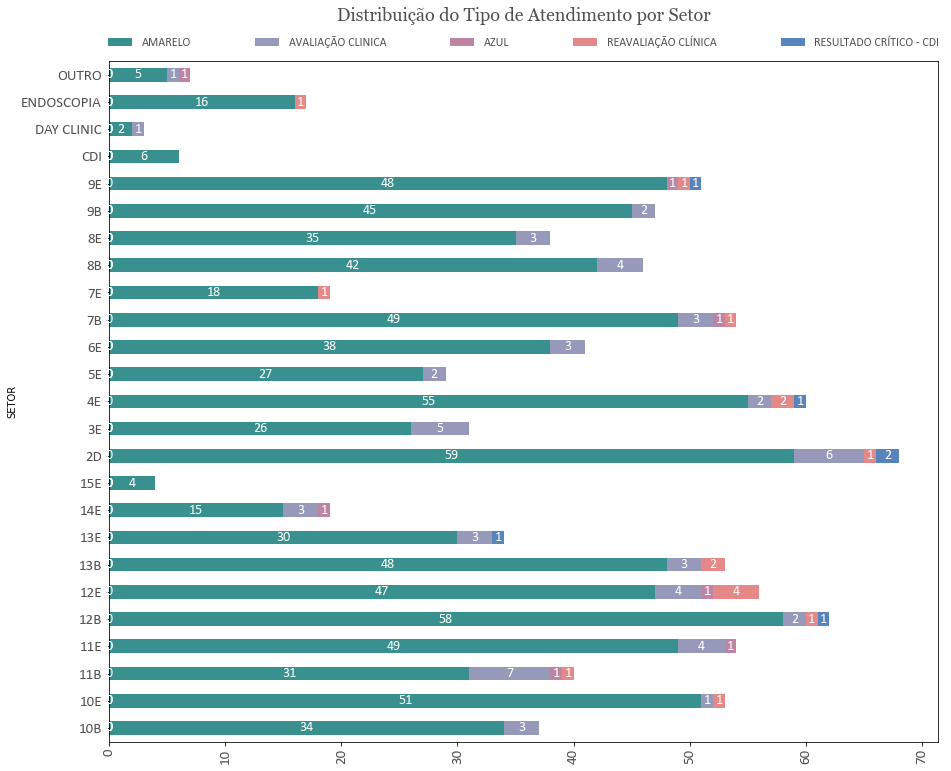

In [10]:
font_color = '#525252'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
colors = ["#38908F", "#9799BA", "#BC85A3", "#E58888", "#5784BA"]

#stacked bar com duas variáveis categóricas

ax1 = df.groupby(['SETOR'])['TIPO_DE_ATENDIMENTO'].value_counts().unstack().plot(kind='barh',figsize=(18, 14), color = colors, stacked = True)
title = plt.title('Distribuição do Tipo de Atendimento por Setor', pad=40, fontsize=18, color=font_color, **csfont)
title.set_position([.5, 1.02])

# Adjust the subplot so that the title would fit
plt.subplots_adjust(top=0.8, left=0.26)
plt.xticks(rotation=90, color = "black", fontsize=10)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(15)
plt.xticks(color=font_color, **hfont)
plt.yticks(color=font_color, **hfont)
    
            
legend = plt.legend(loc='lower center',
       frameon=False,
       bbox_to_anchor=(0., 1.02, 1., .102), 
       mode='expand', 
       ncol=5, #número de itens na legenda
       borderaxespad=-.46,
       prop={'size': 12, 'family':'Calibri'})

for text in legend.get_texts():
    plt.setp(text, color=font_color) # legend font color

    
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=14,
            **hfont)    